<a href="https://colab.research.google.com/github/jlopez00001/M-todos-num-ricos/blob/main/M%C3%A9todos_num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red">Grafica de la función $y=x^2$</font>

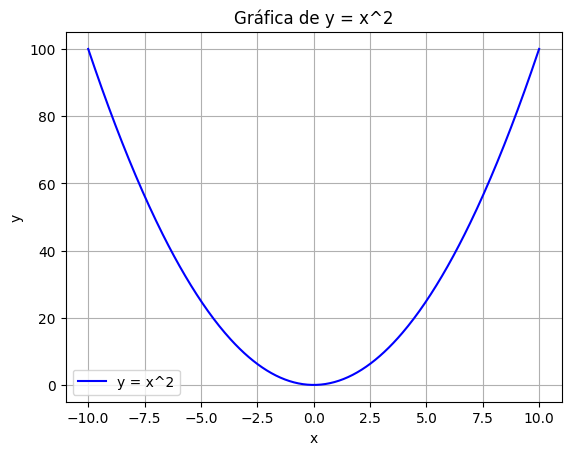

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.linspace(-10, 10, 400)

# Definir la función y = x^2
y = x**2

# Crear la gráfica
plt.plot(x, y, label="y = x^2", color='blue')

# Etiquetas y título
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfica de y = x^2")

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


<font color="grenn"> Sistemas Numéricos</font>

In [ ]:
numero =26
print(numero, "en sistma binario es ", bin(numero))
print(numero, "en sistma octal es ", oct(numero))
print(numero, "en sistma hexadecimal es ", hex(numero))


26 en sistma binario es  0b11010
26 en sistma octal es  0o32
26 en sistma hexadecimal es  0x1a


<font color="grenn"> Entero en base 10 a sitema binario </font>

In [ ]:
def decimal_bianrio(numero): # Definimos la función , en este caso toma como parametro un entero
  bin=""                    #  Definimos una variable que va a guardar el numero binario y lo declaramos como cadena de texto
  while numero !=0:         # Definimos un bucle mientras el cociente sea distinto de 0 continua
    bin= str(numero%2) +bin #  A bin le asignamos el residuo de dividir entre 2 en forma de cadena y le concatenamos lo que lla tenia
    numero = numero//2      # dividimos para que valla cambiando el cociente
  return bin                # la funcción regresa bin

numero = 25
bin =decimal_bianrio(numero)
print (bin)






11001


<font color="grenn"> Entero en base 10 a sistema octal </font>

In [ ]:
def decimal_a_octal(decimal):
    if decimal == 0:
        return "0"

    octal = ""
    while decimal > 0:
        residuo = decimal % 8
        octal = str(residuo) + octal
        decimal //= 8  # División entera

    return octal

# Ejemplo de uso
numero = int(input("Ingrese un número decimal: "))
print(f"El número {numero} en octal es: {decimal_a_octal(numero)}")

El número 25 en octal es: 31


Grafica de la función $cos(x)$ y la serie de Taylor correspondiente   $\frac{-x^6}{720}$

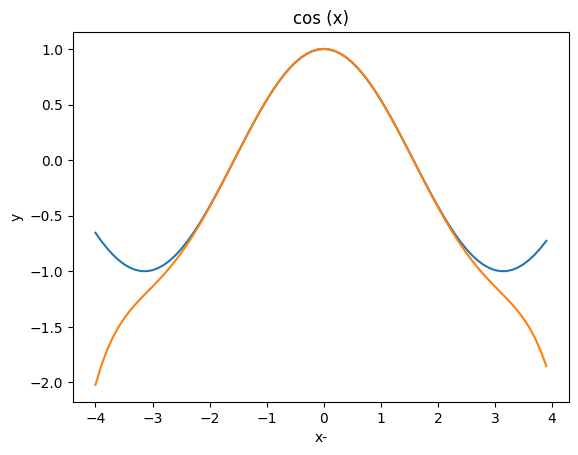

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-4,4,0.1)
y = np.cos(x)
g = -(x**6)/720 + (x**4)/24 -(x**2)/2 +1

plt.plot(x,y)
plt.xlabel('x-')
plt.ylabel('y')
plt.plot(x,g)

plt.title('cos (x)')
plt.show()


<font color="grenn"> Grafica de la función $ln(x)$ y su serie de Taylor de grado 4  </font>

<lambdifygenerated-27>:2: RuntimeWarning: divide by zero encountered in log
  return log(x)


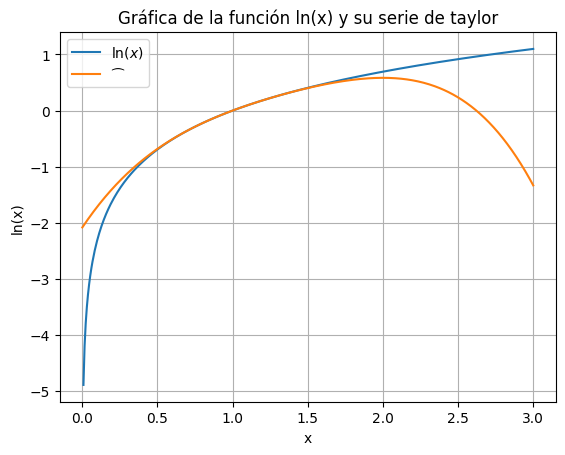

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
x0=1                   # en este caso x0=1
n=5                    # sera de orden 4
# Definir la variable simbólica
x = sp.symbols('x')

# Definir la función ln(x)
f = sp.ln(x)
t=sp.ln(x).series(x,x0,n).removeO()        # En t guardamos la serie de Taylor primero le indicamos conrrespecto a que función

# Convertir la función simbólica a una función numérica
f_lambdified = sp.lambdify(x, f, "numpy")
t=sp.lambdify(x,t,'numpy')
# Crear un rango de valores para x (evitar el 0 porque ln(x) no está definido allí)
x_vals = np.linspace(0, 3, 400)
y_vals = f_lambdified(x_vals)
yvals =t(x_vals)


# Graficar la función
plt.plot(x_vals, y_vals, label=r'$\ln(x)$')
plt.plot(x_vals, yvals, label=r'$\t$')

plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Gráfica de la función ln(x) y su serie de taylor')
plt.legend()
plt.grid(True)
plt.show()


<font color="grenn"> Método de Biseccion  </font>

In [ ]:
import math
from tabulate import tabulate  # espara la tabla


def f(x):              # Definimos la función que deseamos analizar.
    # Ejemplo de clase: f(x) = x^5 - 25
    return x**3 - 25

def biseccion(f, a, b, tol, N): # Definimos la fución biseccion que toma como parametros la función f , el intervalo,tolerancia y numero maximo de iteraciones
    if f(a) * f(b) > 0:          # Una observación para comprobar que la fución en los puntos extremos tienen diferente signo
        print("No se puede aplicar el método de bisección.")
        return None

    iteracion = 0                    # empezamos la iteración en 0
    error = float('inf')             # Declaramos error de tipo flotante
    tabla = []                       # Para almacenar los resultados y mostrarlos en una tabla

    while  iteracion < N and (b - a) / 2 > tol:   # condición para continue el ciclo
        c = (a + b) / 2           # punto medio
        fc = f(c)                  # valor de la función en el punto medio
        error = abs(b - a) / 2     # error en la iteración


        tabla.append([iteracion, a, b, c, fc, error])       # Guardamos los resultados de la iteración

        if fc == 0    :                # Si encontramos la raíz exacta
            return c

        if f(a) * f(c) < 0:           # Es para ver en con que subintervalo nos quedamos
            b = c               # La raíz está en el subintervalo [a, c]
        else:
            a = c  # La raíz está en el subintervalo [c, b]

        iteracion += 1

    # Guardamos el último resultado
    c = (a + b) / 2
    fc = f(c)
    error = abs(b - a) / 2
    tabla.append([iteracion, a, b, c, fc, error])


    headers = ['Iter', 'a', 'b', 'c', 'f(c)', 'Error']   # Imprimir la tabla de resultados usando tabulate
    print(tabulate(tabla, headers=headers, floatfmt=".8f"))

    return c

# Parámetros de entrada
a = 2     # extremo izquierdo del intervalo
b = 4      # extremo derecho del intervalo
tol = 1e-4  # Tolerancia
N = 10  # Número máximo de iteraciones

# Llamada al método de bisección
raiz_aproximada = biseccion(f, a, b, tol, N)

if raiz_aproximada is not None: # imprimimos la raiz aproximada en caso de existir
    print(f"\nLa raíz aproximada es: {raiz_aproximada}")


  Iter           a           b           c         f(c)       Error
------  ----------  ----------  ----------  -----------  ----------
     0  2.00000000  4.00000000  3.00000000   2.00000000  1.00000000
     1  2.00000000  3.00000000  2.50000000  -9.37500000  0.50000000
     2  2.50000000  3.00000000  2.75000000  -4.20312500  0.25000000
     3  2.75000000  3.00000000  2.87500000  -1.23632812  0.12500000
     4  2.87500000  3.00000000  2.93750000   0.34741211  0.06250000
     5  2.87500000  2.93750000  2.90625000  -0.45297241  0.03125000
     6  2.90625000  2.93750000  2.92187500  -0.05492020  0.01562500
     7  2.92187500  2.93750000  2.92968750   0.14570951  0.00781250
     8  2.92187500  2.92968750  2.92578125   0.04526073  0.00390625
     9  2.92187500  2.92578125  2.92382812  -0.00486320  0.00195312
    10  2.92382812  2.92578125  2.92480469   0.02019040  0.00097656

La raíz aproximada es: 2.9248046875


<font color="grenn"> Método de la falsa posición  </font>

In [ ]:


import numpy as np
from tabulate import tabulate
import math
def f(x):              # Definimos la función que deseamos analizar.
    # Ejemplo del libro: f(x) = x -cos(x)
    return x - np.cos(x)


def falsa_posicion(f, a, b, tol=1e-3, max_iter=10): # definimos la función falsa posición


    fa = f(a)             # asignamos variables
    fb = f(b)

    if fa * fb > 0:         # Esto es para verifiar que se cumpla la hipotesis del teorema del valor intermedio
        raise ValueError("El intervalo [a, b] no encierra una raíz (f(a) y f(b) deben tener signos opuestos)")

    xr = a                     # Inicializamos xr con a
    iteraciones = []           # definimos una lita que guarda el numero de iteraciones

    print("\nMétodo de Falsa Posición ")
    print("----------------------------------------------------")

    for i in range(max_iter + 1):          # el for de detendra cuando alcanze el maximo numero de iteraciones o puede ser antes si se alcanza antes el error requerido
        xr_old = xr                        # guardamos el valor actual de xr (la raiz aproximada)
        xr = b - fb * (b - a) / (fb - fa)  # Fórmula de falsa posición que es la interseccion de la recta con el ele x
        fxr = f(xr)                        # guardamos el valor de la funció valuada en la aproximación de la raiz
        error = abs(xr - xr_old) if i > 0 else np.nan  # guardamos el error en valor absoluto, No hay error en la primera iteración
        signo = "Negativo" if fa * fxr < 0 else "Positivo"    # determinar el signo del producto f(a) * f(xr)

        iteraciones.append([i, xr, fxr, signo, error])    # Almacenar los valores en la lista

        if error < tol:                            # Criterio de parada
            break

        # Actualizar valores de a o b
        if fa * fxr < 0:     # si el signo de las evaluaciones de las dos ultimas raices es negtiva, se debe tomar b como la raiz aproximada
            b = xr
            fb = fxr
        else:                 # si el signo de las evaluaciones de las dos ultims rsaices es positiva , sedebe tomar a como la raiz aproximada
            a = xr
            fa = fxr


    print(tabulate(iteraciones, headers=["Iteración", "Raíz Aproximada", "f(Raíz)", "Signo f(a)*f(xr)", "Error"], tablefmt="grid")) # Imprimir la tabla

    return xr, i                              # regresa la raiz aproximada y el numero de iteraciones


if __name__ == "__main__": # función principal

    a, b = 0, math.pi /4  # Intervalo inicial
    raiz, iteraciones = falsa_posicion(f, a, b)  # llamamos a la función
    print(f"\nRaíz aproximada: {raiz:.6f}, Iteraciones: {iteraciones}") # imprimimos los resultados







Método de Falsa Posición - Algoritmo 2.5 de Burden
----------------------------------------------------
+-------------+-------------------+-------------+--------------------+---------------+
|   Iteración |   Raíz Aproximada |     f(Raíz) | Signo f(a)*f(xr)   |         Error |
+=============+===================+=============+====================+===============+
|           0 |          0.611015 | 0.20805     | Positivo           | nan           |
+-------------+-------------------+-------------+--------------------+---------------+
|           1 |          0.732057 | 0.011744    | Positivo           |   0.121042    |
+-------------+-------------------+-------------+--------------------+---------------+
|           2 |          0.73887  | 0.000359593 | Positivo           |   0.00681323  |
+-------------+-------------------+-------------+--------------------+---------------+
|           3 |          0.739079 | 1.04982e-05 | Positivo           |   0.000208598 |
+-------------+----------

<font color="grenn"> Método de iteración de punto fijo  </font>

In [ ]:
from tabulate import tabulate

def g(x):
    # Definimos una función de ejemplo g(x) = (10/4+x)**0.5
    return (10/(4+x))**0.5

def punto_fijo(g, x0, tol=1e-5, max_iter=10): # definimos la función punto fijo, toma como parametros la función g,el valor inicial,tolerancia y maximo numero de iteraciones

    x = x0                   # empezamos en x0
    results = []  # Lista para almacenar los resultados de cada iteración
    for n_iter in range(1, max_iter + 1):  # el ciclo se detiene hasta que lleguemos al numero maximo de itereaciones o se alcanze el error
        x_nuevo = g(x)    # evaluamos x en g y lo guardamos
        error = abs(x_nuevo - x)  # Cálculo del error

        # Almacenamos los valores de cada iteración en la lista
        results.append([n_iter, x_nuevo, g(x_nuevo), error])


        if error < tol:  # si se alcanza el error deseado se detendra el for
            break

        x = x_nuevo     # actualizamos x

    # Imprimir la tabla de resultados
    headers = ["Iteración", "Aproximación", "g(Aproximación)", "Error"]
    print(tabulate(results, headers=headers, tablefmt="grid"))


    return x_nuevo, n_iter # Si se alcanzó el error deseado, devolvemos el resultado



# Valor inicial
x0 = 1.5

# Llamamos a la función con la tolerancia y número máximo de iteraciones
resultado, iteraciones = punto_fijo(g, x0, tol=1e-5, max_iter = 10 )

# Imprimir el resultado final
print(f"\nResultado final: {resultado}")
print(f"Iteraciones realizadas: {iteraciones}")


+-------------+----------------+-------------------+-------------+
|   Iteración |   Aproximación |   g(Aproximación) |       Error |
+=============+================+===================+=============+
|           1 |        1.3484  |           1.36738 | 0.1516      |
+-------------+----------------+-------------------+-------------+
|           2 |        1.36738 |           1.36496 | 0.0189766   |
+-------------+----------------+-------------------+-------------+
|           3 |        1.36496 |           1.36526 | 0.00241936  |
+-------------+----------------+-------------------+-------------+
|           4 |        1.36526 |           1.36523 | 0.000307733 |
+-------------+----------------+-------------------+-------------+
|           5 |        1.36523 |           1.36523 | 3.9154e-05  |
+-------------+----------------+-------------------+-------------+
|           6 |        1.36523 |           1.36523 | 4.98151e-06 |
+-------------+----------------+-------------------+----------

<font color="grenn"> calcular polinomio de lagrange y graficar con simpy  </font>


x**2/2 - x/2 + 2


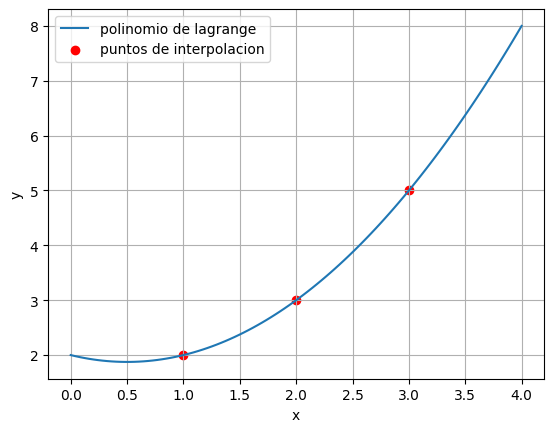

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys

puntos = [(1,2),(2,3),(3,5)]  # en esta lista guardamos los puntos como tuplas
x = sp.Symbol('x')             # definimos x como expreción simbolica
# el siguiente for es para ver que los puntos sean validos , si setiene dos puntos con la misma coordenada en x y diferente coordenada en y
for i in range(len(puntos) - 1):       # no seria valido , por que ya no seria una función

    if puntos[i][0] == puntos[i+1][0]:
        sys.exit("puntos no validos")



def polinomio_de_lagrange(puntos):   # definimos la función que devuelve el polinomio de lagrange
  n = len(puntos)                    # nesesitamos obtner el tamaño de la lista para de finir el grado del polinomio
  pol= 0                            # definimos pol la variable donde guardaremos el polinomio
  for i in range (n):                # para aplicar la formula usamos 2 for iterados
    xi,yi = puntos[i]                  # la primera es para hallar cadas Li de la formula
    ter = yi                             # y el segundo es para recorrer j omitiendo cuando i =j
    for j in range (n):
      if i!=j:
        xj,_=puntos[j]
        ter *= (x-xj) / (xi -xj)           # obtenemos cada Li
    pol+=ter                               # los sumamos para obtener el polinomio
  return sp.simplify(pol)                   # esta función es para simplificar


poli = polinomio_de_lagrange(puntos)         # llamamos a la funcion
print(poli)                                 # visualizmos el polinomio
pol_f = sp.lambdify( x , poli ,'numpy')
x_val = np.linspace(min(p[0] for  p in puntos)-1,max(p[0] for p in puntos)+1, 100)      # rangon y valores de x
y_val = pol_f(x_val)                                                                    # rango y valores para y definidos para la función
plt.plot(x_val,y_val, label='polinomio de lagrange')                                    # etiquetas
plt.scatter(*zip(*puntos), color='red', label='puntos de interpolacion')                # estilo de la grafica
plt.xlabel("x")                                                                         # eje x
plt.ylabel("y")                                                                         # eje y
plt.legend()
plt.grid()
plt.show()
